In [1]:
import os 
import datetime 
import numpy as np
import pandas as pd 
import mplfinance as mpf
import matplotlib.pyplot as plt
import yfinance as yf
import time 
import re 

from ALGO_KT1 import Preprocessing_functions as pf 
from pathlib import Path

In [42]:
start_time = time.time()

prefs = pd.read_csv("prefs_240924.csv")

prefs = prefs.rename(columns={'Symbol\nCUSIP' : 'Symbol'})

days = range(1,21)

prefs.head(1)

,Symbol,Security Description,StockExchange,IPO Date,Cpn Rate\nAnn Amt,LiqPref\nCallPrice,Call Date\nMatur Date,Moodys/S&PDated,15%\nTax Rate,Conv,IPO Prospectus,Distribution Dates
0,SLMNP\n808194302,"A. Schulman, 6.00% Cumulative Perpetual Conver...",OTOTC\nChart,04/30/2015,6.00% \n$60.00,"$1,000.00 \n$1,000.00",n.a. \nNone,NR NF \n3/19/2024,YES,C,Prospectus,"2/1, 5/1, 8/1 & 11/1\nClick for MW ExDiv Date\..."


In [43]:
row = prefs.iloc[0]
idx = 0 


print(row["Symbol"].split('\n')[0].replace('-', '-P'))
ticker = row["Symbol"].split('\n')[0].replace('-', '-P')

call_date = row['Call Date\nMatur Date'].split('\n')[0]
print('call date',call_date)
mat_date = row['Call Date\nMatur Date'].split('\n')[1]
print('mat date',mat_date)
cpn_rate = row['Cpn Rate\nAnn Amt'].split("\n")[0].strip()
print('cpn rate',cpn_rate)
ann_rate = row['Cpn Rate\nAnn Amt'].split("\n")[1].strip()
print('ann rate',ann_rate)


SLMNP
call date n.a. 
mat date None 
cpn rate 6.00%
ann rate $60.00


In [44]:
df = pf.downlaod_symbol_data(ticker, period = "6mo")

df['label'] = np.where(df['Close'] > df['Close'].shift(1), "green", "red")

df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,open_low,open_close,open_high,high_low,low_close,high_close,gap,label
Date,,,,,,,,,,,,,,,
2024-09-25 00:00:00-04:00,935.0,935.0,935.0,935.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,red
2024-09-26 00:00:00-04:00,935.0,935.0,935.0,935.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,red


In [41]:
for day in days:
    df[f'down_{day}'] = (df['Close'] / df['Close'].shift(day) - 1) * 100 

df.tail(2)

Date
2024-03-27 00:00:00-04:00         NaN
2024-03-28 00:00:00-04:00    0.000000
2024-04-01 00:00:00-04:00    0.059367
2024-04-02 00:00:00-04:00   -0.059332
2024-04-03 00:00:00-04:00    0.000000
                               ...   
2024-09-20 00:00:00-04:00    0.000000
2024-09-23 00:00:00-04:00    0.000000
2024-09-24 00:00:00-04:00    0.000000
2024-09-25 00:00:00-04:00    0.000000
2024-09-26 00:00:00-04:00    0.000000
Name: down_1, Length: 127, dtype: float64
Date
2024-03-27 00:00:00-04:00    825.37
2024-03-28 00:00:00-04:00    825.37
2024-04-01 00:00:00-04:00    825.86
2024-04-02 00:00:00-04:00    825.37
2024-04-03 00:00:00-04:00    825.37
                              ...  
2024-09-20 00:00:00-04:00    935.00
2024-09-23 00:00:00-04:00    935.00
2024-09-24 00:00:00-04:00    935.00
2024-09-25 00:00:00-04:00    935.00
2024-09-26 00:00:00-04:00    935.00
Name: Close, Length: 127, dtype: float64
Date
2024-03-27 00:00:00-04:00       NaN
2024-03-28 00:00:00-04:00    825.37
2024-04-01 00:00

,Open,High,Low,Close,Volume,Dividends,Stock Splits,open_low,open_close,open_high,...,down_11,down_12,down_13,down_14,down_15,down_16,down_17,down_18,down_19,down_20
Date,,,,,,,,,,,,,,,,,,,,,
2024-09-25 00:00:00-04:00,935.0,935.0,935.0,935.0,0,0.0,0.0,0.0,0.0,0.0,...,-0.848356,-0.848356,8.720930,-6.50000,11.111111,11.111111,11.111111,11.111111,11.163952,11.163952
2024-09-26 00:00:00-04:00,935.0,935.0,935.0,935.0,0,0.0,0.0,0.0,0.0,0.0,...,1.081081,-0.848356,-0.848356,8.72093,-6.500000,11.111111,11.111111,11.111111,11.111111,11.163952


In [28]:
row_today = df.tail(1)
row_today

,Open,High,Low,Close,Volume,Dividends,Stock Splits,open_low,open_close,open_high,...,down_11,down_12,down_13,down_14,down_15,down_16,down_17,down_18,down_19,down_20
Date,,,,,,,,,,,,,,,,,,,,,
2024-09-26 00:00:00-04:00,935.0,935.0,935.0,935.0,0,0.0,0.0,0.0,0.0,0.0,...,1.081081,-0.848356,-0.848356,8.72093,-6.5,11.111111,11.111111,11.111111,11.111111,11.163952


In [29]:
current_yield = np.round(float(ann_rate.replace("$",'')) / row_today['Close'].item(),4)*100
current_yield

6.419999999999999

In [37]:
row_today.iloc[: , 15:]

,down_1,down_2,down_3,down_4,down_5,down_6,down_7,down_8,down_9,down_10,down_11,down_12,down_13,down_14,down_15,down_16,down_17,down_18,down_19,down_20
Date,,,,,,,,,,,,,,,,,,,,
2024-09-26 00:00:00-04:00,0.0,0.0,0.0,0.0,0.0,1.520087,1.630435,-0.424925,1.409978,1.081081,1.081081,-0.848356,-0.848356,8.72093,-6.5,11.111111,11.111111,11.111111,11.111111,11.163952


In [40]:
df.tail(10).iloc[:, :]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,open_low,open_close,open_high,...,down_11,down_12,down_13,down_14,down_15,down_16,down_17,down_18,down_19,down_20
Date,,,,,,,,,,,,,,,,,,,,,
2024-09-13 00:00:00-04:00,940.0,940.00,922.0,922.00,100,0.0,0.0,1.914894,1.914894,0.000000,...,9.618357,9.618357,9.761905,9.761905,9.761905,9.761905,9.761905,9.761905,9.761905,9.761905
2024-09-16 00:00:00-04:00,922.0,938.99,922.0,938.99,100,0.0,0.0,0.000000,-1.842733,-1.842733,...,11.585264,11.638331,11.638331,11.784524,11.784524,11.784524,11.784524,11.784524,11.784524,11.784524
2024-09-17 00:00:00-04:00,940.0,940.00,920.0,920.00,200,0.0,0.0,2.127660,2.127660,0.000000,...,9.328580,9.328580,9.380573,9.380573,9.523810,9.523810,9.523810,9.523810,9.523810,9.523810
2024-09-18 00:00:00-04:00,932.0,935.00,921.0,921.00,100,0.0,0.0,1.180258,1.180258,-0.321888,...,9.447415,9.447415,9.447415,9.499465,9.499465,9.642857,9.642857,9.642857,9.642857,9.642857
2024-09-19 00:00:00-04:00,920.0,935.00,920.0,935.00,100,0.0,0.0,0.000000,-1.630435,-1.630435,...,11.111111,11.111111,11.111111,11.111111,11.163952,11.163952,11.309524,11.309524,11.309524,11.309524
2024-09-20 00:00:00-04:00,935.0,935.00,935.0,935.00,100,0.0,0.0,0.000000,0.000000,0.000000,...,-6.500000,11.111111,11.111111,11.111111,11.111111,11.163952,11.163952,11.309524,11.309524,11.309524
2024-09-23 00:00:00-04:00,935.0,935.00,935.0,935.00,0,0.0,0.0,0.000000,0.000000,0.000000,...,8.720930,-6.500000,11.111111,11.111111,11.111111,11.111111,11.163952,11.163952,11.309524,11.309524
2024-09-24 00:00:00-04:00,935.0,935.00,935.0,935.00,0,0.0,0.0,0.000000,0.000000,0.000000,...,-0.848356,8.720930,-6.500000,11.111111,11.111111,11.111111,11.111111,11.163952,11.163952,11.309524
2024-09-25 00:00:00-04:00,935.0,935.00,935.0,935.00,0,0.0,0.0,0.000000,0.000000,0.000000,...,-0.848356,-0.848356,8.720930,-6.500000,11.111111,11.111111,11.111111,11.111111,11.163952,11.163952


day: 15
BUY: SLMNP - on the BID


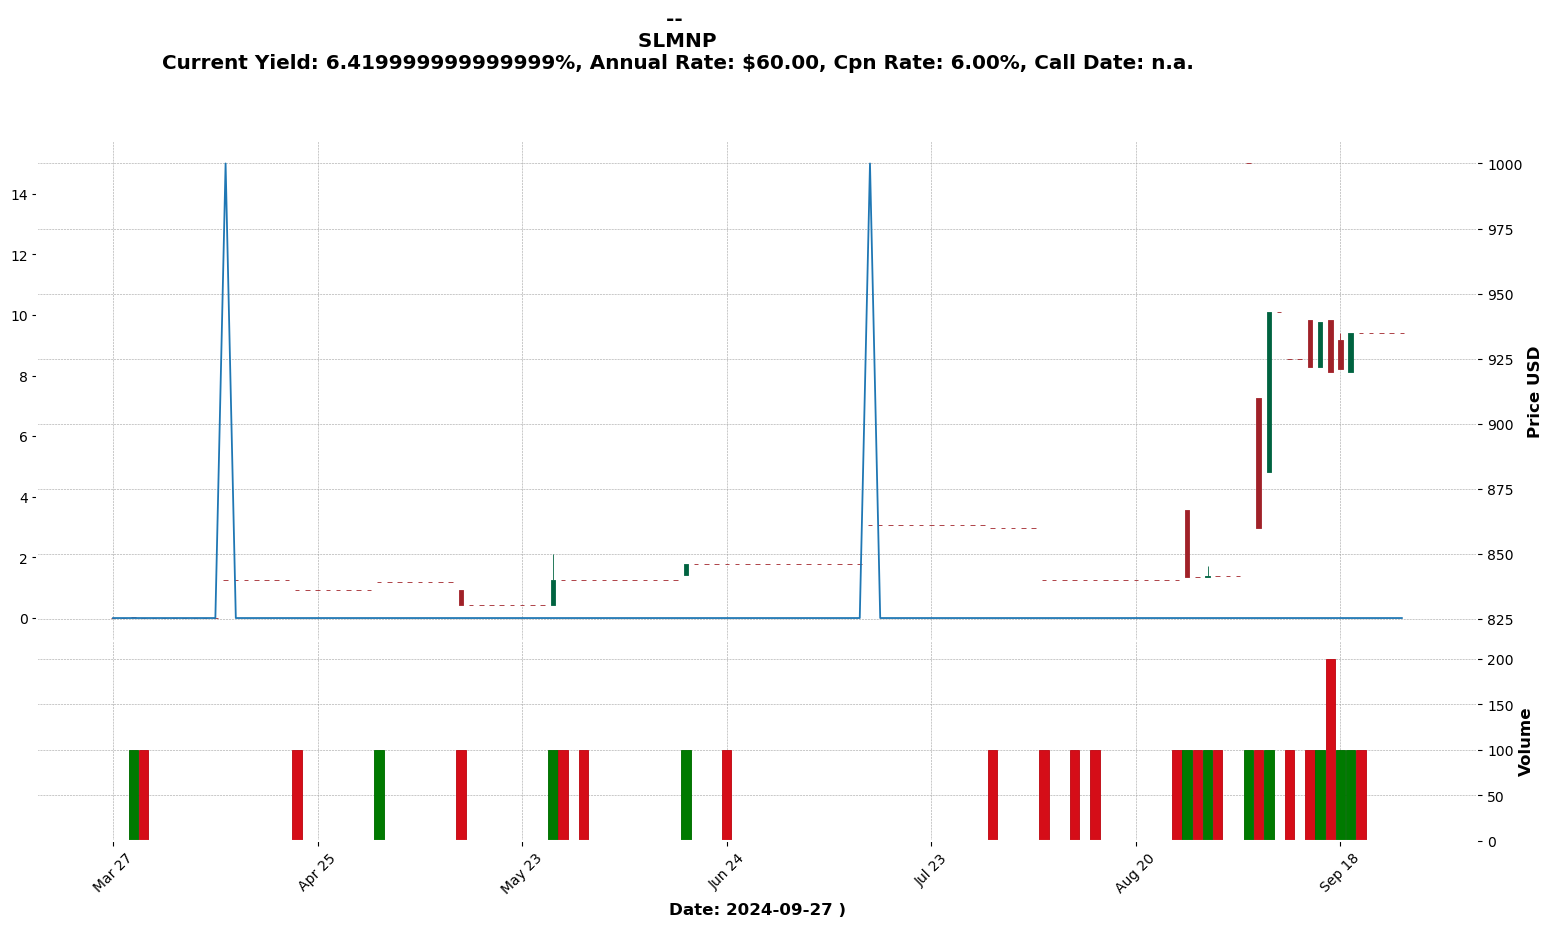

In [34]:

for n in days:

    if row_today[f'down_{n}'].item() < -2:
        print('day:' , n)
        print(f"BUY: {ticker} - on the BID")
        
        
        DATE = datetime.datetime.today().strftime("%Y_%m_%d")
        MODEL_PATH = Path(f"Orders/{DATE}/")
        MODEL_PATH.mkdir(parents = True, exist_ok = True)
        
        mpf.plot(df, type='candle', 
                    style='charles', 
                    volume=True,
                    figsize = (20,10),
                    title = f"-- \n {ticker} \n Current Yield: {current_yield}%, Annual Rate: {ann_rate}, Cpn Rate: {cpn_rate}, Call Date: {call_date}",
                    xlabel = f"Date: {DATE.replace('_', '-')} )",
                    ylabel = "Price USD",
                    addplot = mpf.make_addplot(df['Dividends']),
                    #savefig= MODEL_PATH / f'{ticker}.png'
                    )

#### Filter prefs list for DAS sorters 

In [86]:
prefs['StockExchange'].unique()

array(['OTOTC\nChart ', 'NYSE\nChart', 'NGS\nChart ', 'NGM\nChart ',
       'StockExchange', 'NCM\nChart ', 'OTCBB\nChart ', 'AMEX\nChart ',
       nan, 'TRACE '], dtype=object)

In [88]:

syms = prefs[['Symbol', 'StockExchange']]

exchages = [ 'NYSE\nChart', 'NGS\nChart ', 'NGM\nChart ',
       'StockExchange', 'NCM\nChart ', 'AMEX\nChart ',]

syms['Symbol'] = syms['Symbol'].str.split('\n').apply(lambda x : x[0])
syms = syms[syms['StockExchange'].isin(exchages)]

syms = syms[['Symbol']]

syms

C:\Users\User\AppData\Local\Temp\ipykernel_16444\1004165294.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syms['Symbol'] = syms['Symbol'].str.split('\n').apply(lambda x : x[0])


,Symbol
1,ACP-A
2,ACR-C
3,ACR-D
4,MITT-B
5,MITT-C
...,...
797,XOMAO
798,XOMAP
800,ZIONO
801,Symbol


In [89]:
syms.to_csv('prefs_list.txt', sep = '\t', index=False)